In [1]:
#########################################
# CNN on MNIST Fashion Dataset
# By Giriraj Vaishnav
#########################################

In [4]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [5]:
# Set the seed for reproducibility and load the data MNIST dataset

seed=10
np.random.seed(seed)
(X_train,y_train), (X_test, y_test)= fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
# Convert the data into float values

X_train=X_train.reshape(X_train.shape[0], 1,28,28).astype('float32')
X_test=X_test.reshape(X_test.shape[0], 1,28,28).astype('float32')

In [7]:
# Normalize the data

X_train=X_train/255
X_test=X_test/255
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
num_classes=y_train.shape[1]
print(num_classes)

10


In [8]:
# Training the CNN model 

model=Sequential()
model.add(Conv2D(32,5,5, padding='same',input_shape=(1,28,28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
H = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 17s - loss: 0.8573 - accuracy: 0.6967 - val_loss: 0.5492 - val_accuracy: 0.8019
Epoch 2/10
300/300 - 2s - loss: 0.5296 - accuracy: 0.8094 - val_loss: 0.4624 - val_accuracy: 0.8339
Epoch 3/10
300/300 - 2s - loss: 0.4756 - accuracy: 0.8281 - val_loss: 0.4317 - val_accuracy: 0.8460
Epoch 4/10
300/300 - 2s - loss: 0.4454 - accuracy: 0.8390 - val_loss: 0.4130 - val_accuracy: 0.8508
Epoch 5/10
300/300 - 2s - loss: 0.4252 - accuracy: 0.8470 - val_loss: 0.4037 - val_accuracy: 0.8542
Epoch 6/10
300/300 - 2s - loss: 0.4091 - accuracy: 0.8522 - val_loss: 0.3868 - val_accuracy: 0.8606
Epoch 7/10
300/300 - 2s - loss: 0.4010 - accuracy: 0.8546 - val_loss: 0.3907 - val_accuracy: 0.8595
Epoch 8/10
300/300 - 2s - loss: 0.3897 - accuracy: 0.8589 - val_loss: 0.3728 - val_accuracy: 0.8646
Epoch 9/10
300/300 - 2s - loss: 0.3845 - accuracy: 0.8605 - val_loss: 0.3702 - val_accuracy: 0.8679
Epoch 10/10
300/300 - 2s - loss: 0.3753 - accuracy: 0.8642 - val_loss: 0.3692 - val_accuracy: 0.864

In [9]:
# Evaluating the model

score= model.evaluate(X_test, y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

The error is: 13.54%


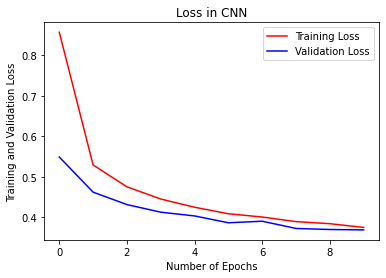

In [10]:
# Ploting the graph for Training and Validation Loss

from matplotlib import pyplot as plt
plt.plot(range(0,10), H.history["loss"], "r", label = "Training Loss")
plt.plot(range(0,10), H.history["val_loss"], "b", label = "Validation Loss")
plt.title("Loss in CNN")
plt.legend(loc = "upper right")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Loss")
plt.show()

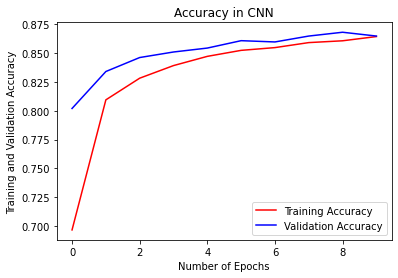

In [11]:
# Ploting the graph for Training and Validation Accuracy

from matplotlib import pyplot as plt
plt.plot(range(0,10), H.history["accuracy"], "r", label = "Training Accuracy")
plt.plot(range(0,10), H.history["val_accuracy"], "b", label = "Validation Accuracy")
plt.title("Accuracy in CNN")
plt.legend(loc = "lower right")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Accuracy")
plt.show()

In [12]:
# Predicting the Test Set

pred_labels = model.predict_classes(X_test)
print(pred_labels)
test_label = np.argmax(y_test, axis=1)
print(test_label)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


In [13]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_label, pred_labels)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[843   1  11  33   6   2  93   0  11   0]
 [  4 956   0  30   3   0   7   0   0   0]
 [ 14   0 758  12 118   0  97   0   1   0]
 [ 39   7  13 871  37   0  30   0   3   0]
 [  0   0  87  40 796   0  76   0   1   0]
 [  1   0   0   1   0 963   0  18   2  15]
 [165   1  87  30  89   0 619   0   9   0]
 [  0   0   0   0   0  30   0 929   1  40]
 [  3   1   4   7   5   3  15   5 957   0]
 [  1   0   0   0   0   8   0  37   0 954]]


In [14]:
# Classification report for precision, recall f1-score and accuracy

from sklearn.metrics import classification_report

report = classification_report(test_label,pred_labels)
print('Classification report : \n',report)

Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.79      0.76      0.77      1000
           3       0.85      0.87      0.86      1000
           4       0.76      0.80      0.78      1000
           5       0.96      0.96      0.96      1000
           6       0.66      0.62      0.64      1000
           7       0.94      0.93      0.93      1000
           8       0.97      0.96      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

